In [1]:
import numpy as np
import kwant

import sympy
sympy.init_printing(print_builtin=False)

from semicon import models, parameters

# Test methods of basic BulkModel class

## Simple case

In [2]:
hamiltonian = kwant.continuum.sympify("A_x * k_x**2 + B_x * k_y**2")
model = models.Model(hamiltonian)

In [3]:
model.hamiltonian

In [4]:
R = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])
model.rotate(R).hamiltonian

## Matrix structure

In [5]:
tmp = "alpha_{0} * k_{0} * sigma_{0}"
ham_str = " + ".join(tmp.format(s) for s in ['x', 'y', 'z'])
R = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

### Reference approach

In [6]:
sx, sy, sz = sympy.symbols('sigma_x sigma_y sigma_z')

hamiltonian = kwant.continuum.sympify(
    ham_str,
    locals={'sigma_x': sx, 'sigma_y': sy, 'sigma_z': sz}

)

model = models.Model(hamiltonian)

In [7]:
model.hamiltonian

In [8]:
act_on = (kwant.continuum.momentum_operators, [sx, sy, sz])
model = model.rotate(R, act_on=act_on)

In [9]:
model.hamiltonian

In [10]:
kwant.continuum.sympify(str(model.hamiltonian))

⎡     α_z⋅k_z       -ⅈ⋅αₓ⋅k_y + α_y⋅kₓ⎤
⎢                                     ⎥
⎣ⅈ⋅αₓ⋅k_y + α_y⋅kₓ       -α_z⋅k_z     ⎦

### Wrong approach (no information about the spin)

In [11]:
model = models.Model(kwant.continuum.sympify(ham_str))
model.rotate(R).prettify(zero_atol=1e-6, nsimplify=True).hamiltonian

⎡     α_z⋅k_z       αₓ⋅k_y + ⅈ⋅α_y⋅kₓ⎤
⎢                                    ⎥
⎣αₓ⋅k_y - ⅈ⋅α_y⋅kₓ      -α_z⋅k_z     ⎦

### Correct approach (with information about the spin)

In [12]:
model = models.Model(kwant.continuum.sympify(ham_str), spins=1/2)
model.rotate(R).prettify(zero_atol=1e-6, nsimplify=True).hamiltonian

⎡     α_z⋅k_z       -ⅈ⋅αₓ⋅k_y + α_y⋅kₓ⎤
⎢                                     ⎥
⎣ⅈ⋅αₓ⋅k_y + α_y⋅kₓ       -α_z⋅k_z     ⎦

In [13]:
model.spin_operators

array([[[ 0. +0.j ,  0.5+0.j ],
        [ 0.5+0.j ,  0. +0.j ]],

       [[ 0. +0.j ,  0. -0.5j],
        [ 0. +0.5j,  0. +0.j ]],

       [[ 0.5+0.j ,  0. +0.j ],
        [ 0. +0.j , -0.5+0.j ]]])

# ZincBlende model

In [14]:
model = models.ZincBlende(
    bands=('gamma_8v', 'gamma_7v'),
    components=('foreman', )
)

In [15]:
model.spins

[1.5, 0.5]

In [16]:
model.spin_operators.shape

(3, 6, 6)

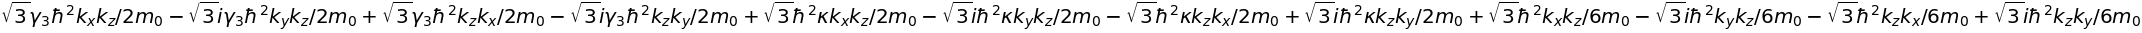

In [17]:
model.hamiltonian[0, 1]

In [18]:
model = model.rotate(R)

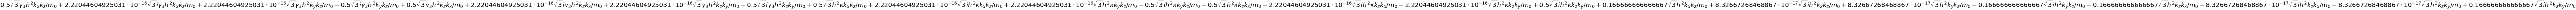

In [19]:
model.hamiltonian[0, 1]

In [20]:
model.prettify(decimals=10).hamiltonian[0, 1]

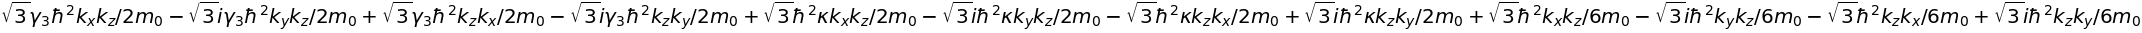

In [21]:
model.prettify(zero_atol=1e-8, nsimplify=True).hamiltonian[0, 1]

# Parameters

### default databank can be provided

In [22]:
model = models.ZincBlende(
    bands=('gamma_6c', 'gamma_8v', 'gamma_7v'),
    components=('foreman', ),
    default_databank='lawaetz',
)

model.parameters('InAs')

{'E_0': 0.42, 'Delta_0': 0.38, 'P': 0.9197, 'g_c': 1.9387298407111935, 'gamma_1': 2.050284378198743, 'gamma_2': -0.43985781090063014, 'gamma_3': 0.4801421890993698, 'kappa': -1.1298578109006296, 'q': 0.04, 'gamma_0': -1.0115210754829604, 'E_v': 0, 'm_0': 510998.94609999994, 'phi_0': 4135.667662, 'mu_B': 5.7883818012e-05, 'hbar': 197.3269788}

### it can be overwritten or provided later as well

In [23]:
db = parameters.DataBank('winkler')
model.parameters('InAs', databank=db)

{'E_0': 0.418, 'Delta_0': 0.38, 'P': 0.9197, 'g_c': 1.960971886891162, 'gamma_1': 2.6959795187642825, 'gamma_2': -0.5520102406178573, 'gamma_3': 0.24798975938214163, 'kappa': -1.2520102406178584, 'q': 0.39, 'gamma_0': -1.0134532295192091, 'E_v': 0, 'm_0': 510998.94609999994, 'phi_0': 4135.667662, 'mu_B': 5.7883818012e-05, 'hbar': 197.3269788}

## workaround to spurious solutions can be easily applied

In [24]:
InAs = model.parameters('InAs')

In [25]:
InAs.renormalize(new_gamma_0=1)

{'E_0': 0.42, 'Delta_0': 0.38, 'P': 0.8986682778019771, 'g_c': 1.1819199311235522, 'gamma_1': 2.8469263882910028, 'gamma_2': -0.04153680585450026, 'gamma_3': 0.8784631941454997, 'kappa': -0.7315368058544998, 'q': 0.04, 'gamma_0': 0.9999999999999964, 'E_v': 0, 'm_0': 510998.94609999994, 'phi_0': 4135.667662, 'mu_B': 5.7883818012e-05, 'hbar': 197.3269788}

In [26]:
InAs.renormalize(new_P=0.8986682778019771)

{'E_0': 0.42, 'Delta_0': 0.38, 'P': 0.8986682778019771, 'g_c': 1.1819199311235522, 'gamma_1': 2.8469263882910028, 'gamma_2': -0.04153680585450026, 'gamma_3': 0.8784631941454997, 'kappa': -0.7315368058544998, 'q': 0.04, 'gamma_0': 0.9999999999999964, 'E_v': 0, 'm_0': 510998.94609999994, 'phi_0': 4135.667662, 'mu_B': 5.7883818012e-05, 'hbar': 197.3269788}